In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

What about 3D translation, scaling, and rotations?

3D translations are easy: 4x4 identity matrix (incl homogenous coordinate), with translations assigned to last column; last column's ith value operates on ith column of input.

3D scaling is also easy: 4x4 matrix (incl homogenous coordinate), with scaling for ith dimension assigned to the (i,i)th value; (i, i)th value operates on ith column of input.

3D rotations are harder. See below!


In [2]:
# yaw
def rotateTransformX(x):
    return np.array([1, 0, 0, 0, np.cos(np.radians(x)), -np.sin(np.radians(x)), 0, np.sin(np.radians(x)), np.cos(np.radians(x))]).reshape(3, 3)

# pitch
def rotateTransformY(y):
    return np.array([np.cos(np.radians(y)), 0, np.sin(np.radians(y)), 0, 1, 0, -np.sin(np.radians(y)), 0, np.cos(np.radians(y))]).reshape(3, 3)

# roll
def rotateTransformZ(z):
    return np.array([np.cos(np.radians(z)), -np.sin(np.radians(z)), 0, np.sin(np.radians(z)), np.cos(np.radians(z)), 0, 0, 0, 1]).reshape(3, 3)

In [16]:
data = np.array([[1,3,1], [3,1,1], [1,1,1], [1,3,3]])

In [4]:
# %matplotlib notebook
 
# Create Figure

def makePlot(data):
    fig = plt.figure()
    ax = plt.axes(projection ="3d")
    colors = ['red', 'yellow', 'blue', 'black']
    # Create Plot
    for i in range(0, 3):
        ax.scatter3D(data[i, 0], data[i, 1], data[i, 2], color=colors[i])
        # Add line
        ax.plot3D(data[:, 0], data[:, 1], data[:, 2])
    # Add axis labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    # Show plot
    plt.show()

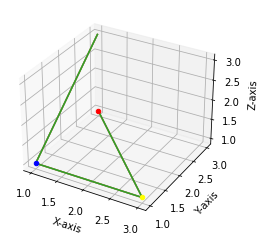

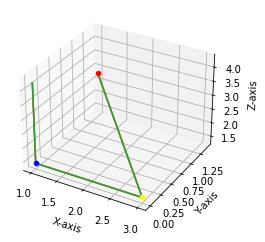

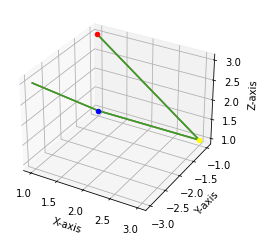

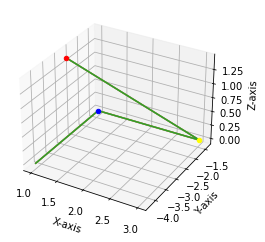

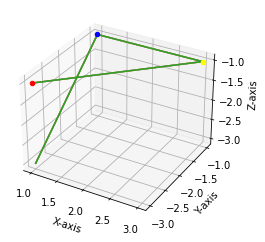

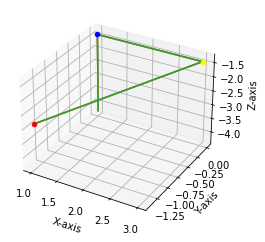

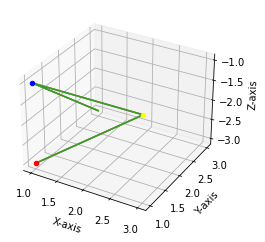

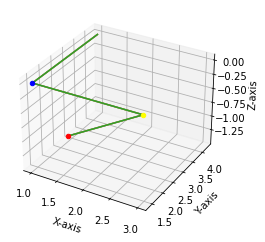

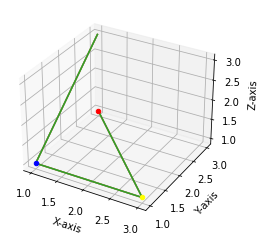

In [5]:
makePlot(data)
for degrees in [45, 90, 135, 180, 225, 270, 315, 360]:
    transformMatrix = rotateTransformX(degrees)
    newData = (transformMatrix@data.T).T
    makePlot(newData)

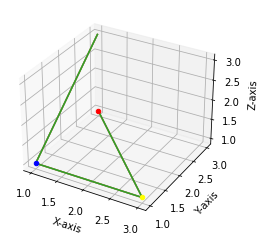

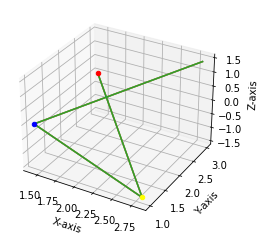

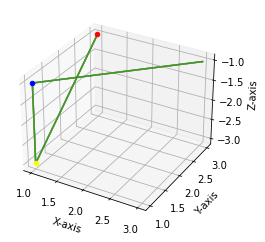

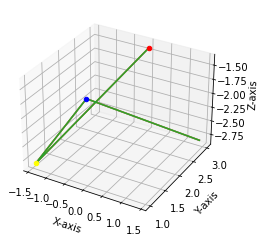

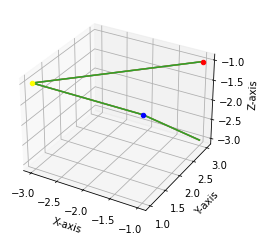

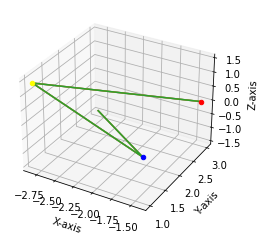

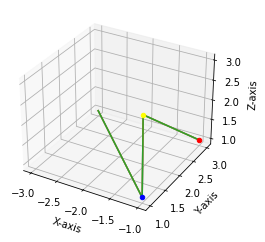

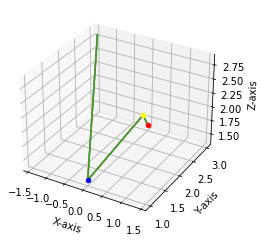

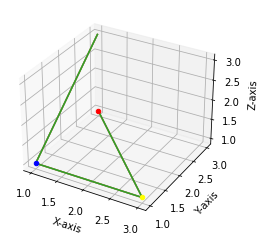

In [6]:
makePlot(data)
for degrees in [45, 90, 135, 180, 225, 270, 315, 360]:
    transformMatrix = rotateTransformY(degrees)
    newData = (transformMatrix@data.T).T
    makePlot(newData)

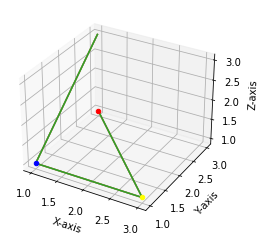

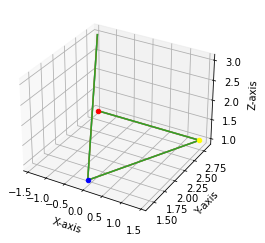

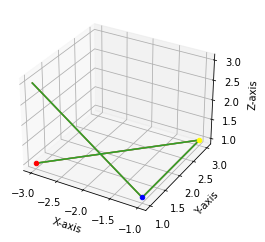

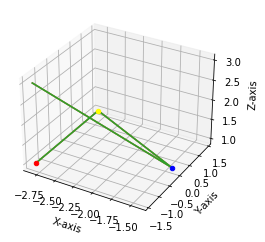

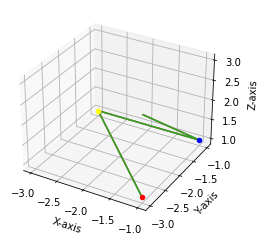

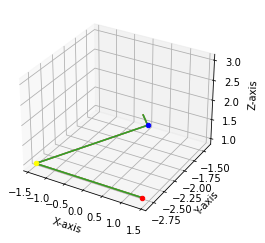

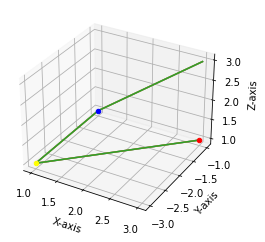

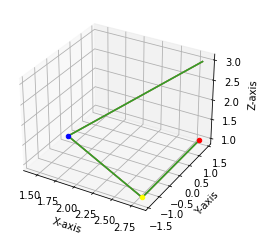

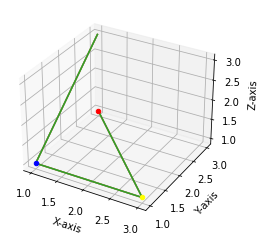

In [7]:
makePlot(data)
for degrees in [45, 90, 135, 180, 225, 270, 315, 360]:
    transformMatrix = rotateTransformZ(degrees)
    newData = (transformMatrix@data.T).T
    makePlot(newData)

How do we do rotate *around a point*? We translate, rotate, and then translate back. We will need to add our homogenous coordinate because we will be translating.